<a href="https://colab.research.google.com/github/Millichapo/credit/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Load the dataset
credit = pd.read_csv('/content/synthetic_credit_consumers.csv')

# Get basic information about the dataset
print(credit.info(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   object 
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   float64
 3   CreditScore        1000 non-null   float64
 4   TransactionAmount  1000 non-null   float64
 5   LoanAmount         1000 non-null   float64
 6   LatePayments       1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB
None


In [8]:
import pandas as pd

# Load the dataset
smes = pd.read_csv('/content/synthetic_smes.csv')

# Get basic information about the dataset
print(smes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BusinessID           200 non-null    object 
 1   BusinessName         200 non-null    object 
 2   AnnualRevenue        200 non-null    float64
 3   CreditScore          200 non-null    float64
 4   LatePayments         200 non-null    float64
 5   Industry_Healthcare  200 non-null    float64
 6   Industry_Retail      200 non-null    float64
 7   Industry_Technology  200 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.6+ KB
None


In [10]:
smes.describe()

,AnnualRevenue,CreditScore,LatePayments,Industry_Healthcare,Industry_Retail,Industry_Technology
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.554841e+06,581.720000,4.845000,0.245000,0.215000,0.250000
std,1.422376e+06,155.620985,3.186179,0.431166,0.411853,0.434099
min,1.005360e+05,303.000000,0.000000,0.000000,0.000000,0.000000
25%,1.306591e+06,456.250000,2.000000,0.000000,0.000000,0.000000
50%,2.543492e+06,587.500000,5.000000,0.000000,0.000000,0.000000
75%,3.845366e+06,709.750000,8.000000,0.000000,0.000000,0.250000
max,4.915842e+06,850.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
credit.describe()

,Age,CreditScore,TransactionAmount,LoanAmount,LatePayments
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,41.859000,575.622000,4993.351000,2562.470000,2.44100
std,13.518945,161.764572,2801.205026,1411.048132,1.68504
min,18.000000,300.000000,117.000000,1.000000,0.00000
25%,31.000000,436.750000,2623.000000,1370.750000,1.00000
50%,42.000000,573.000000,4932.000000,2564.500000,2.00000
75%,53.000000,718.500000,7295.000000,3774.500000,4.00000
max,65.000000,850.000000,9975.000000,5000.000000,5.00000


In [12]:
# Check for missing values in the dataset
print(credit.isnull().sum())


CustomerID           0
Name                 0
Age                  0
CreditScore          0
TransactionAmount    0
LoanAmount           0
LatePayments         0
dtype: int64


In [13]:
# Check for missing values in the dataset
print(smes.isnull().sum())


BusinessID             0
BusinessName           0
AnnualRevenue          0
CreditScore            0
LatePayments           0
Industry_Healthcare    0
Industry_Retail        0
Industry_Technology    0
dtype: int64


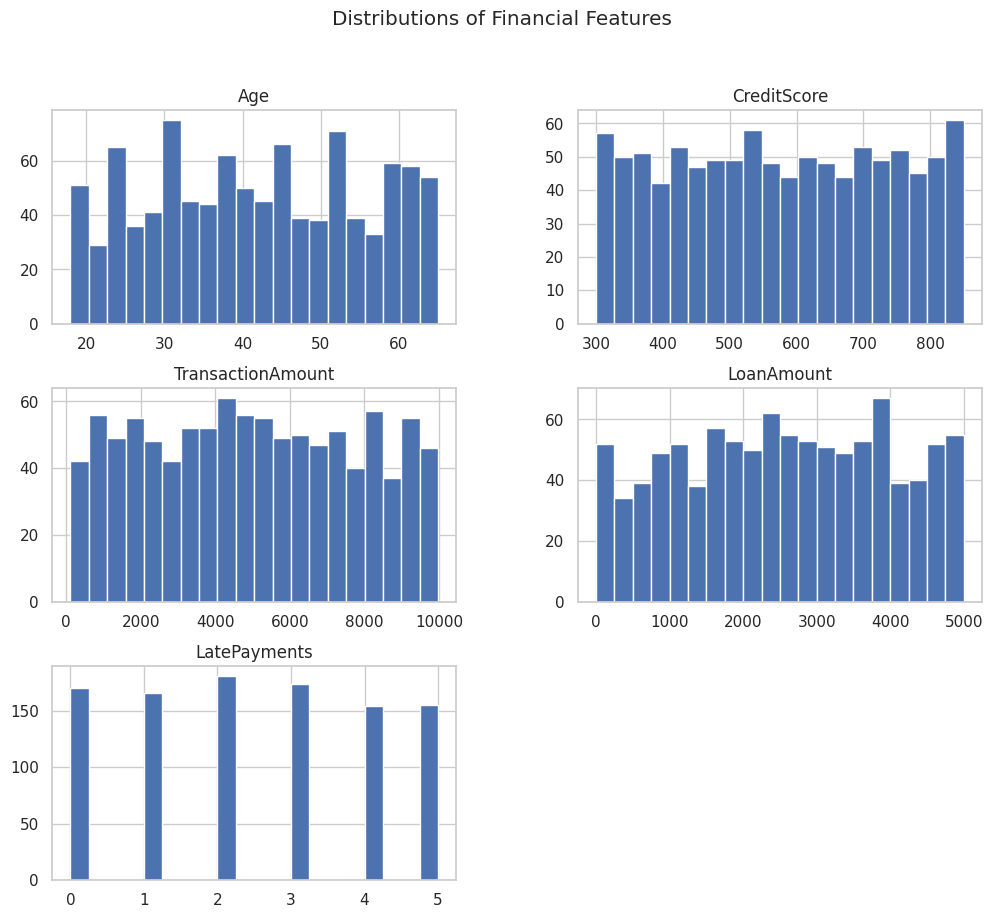

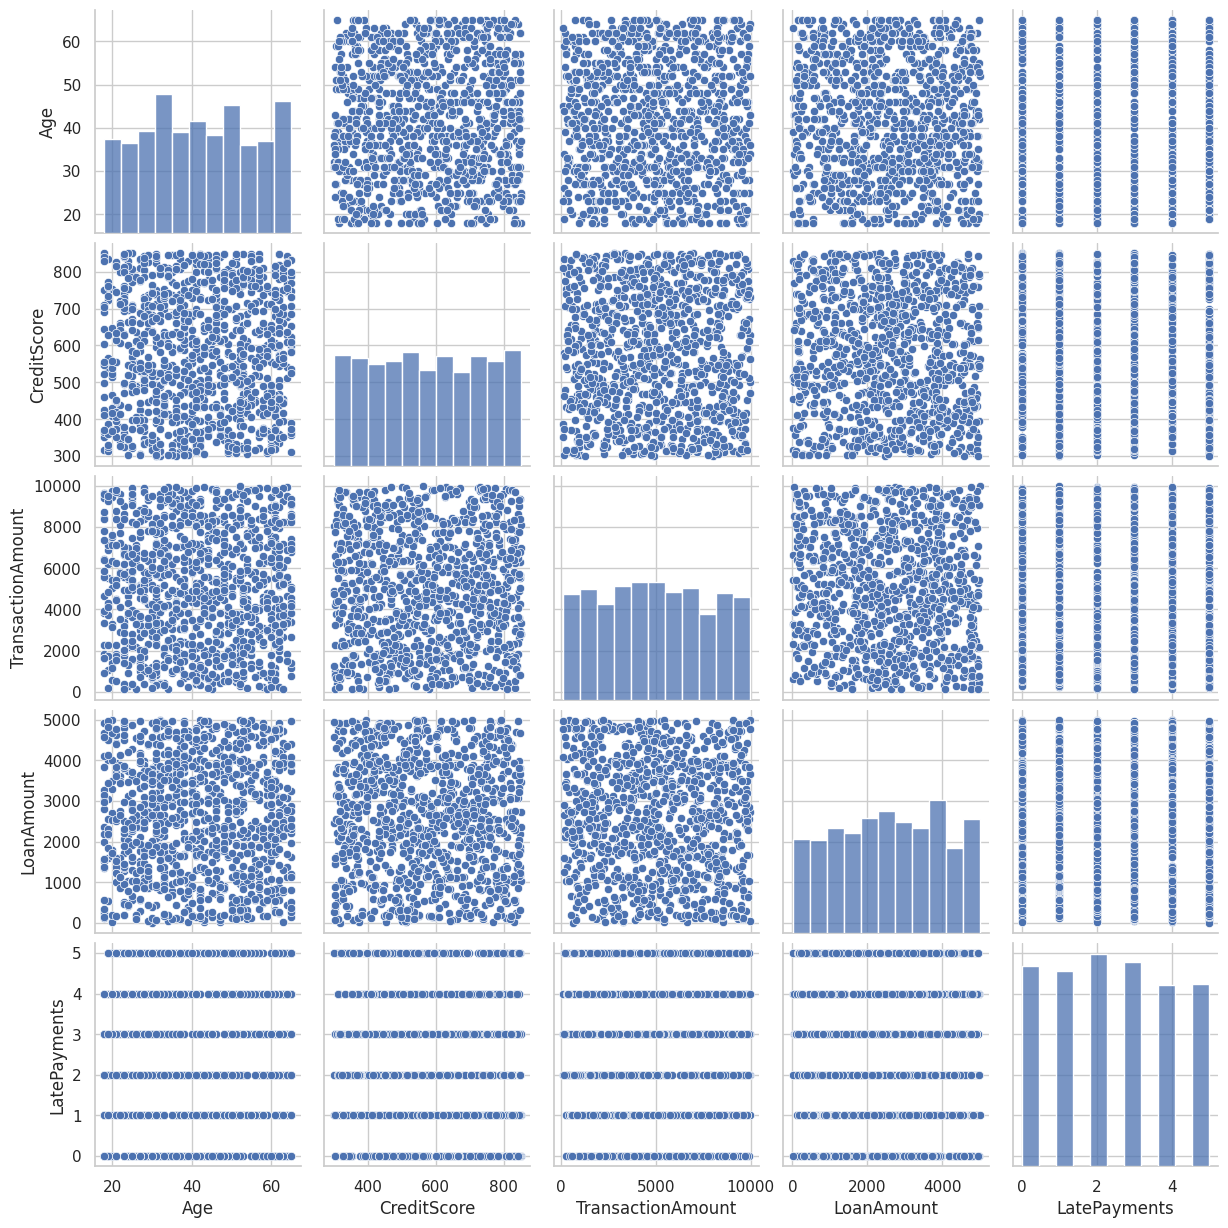

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot histograms of numerical features
credit[['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Distributions of Financial Features')
plt.show()

# Plot pairplot to see relationships between variables
sns.pairplot(credit[['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments']])
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for clustering
numerical_features = ['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments']

# Normalize/Standardize the features
scaler = StandardScaler()
credit_scaled = scaler.fit_transform(credit[numerical_features])

# Convert the scaled data back to a DataFrame for easier handling
credit_scaled_df = pd.DataFrame(credit_scaled, columns=numerical_features)


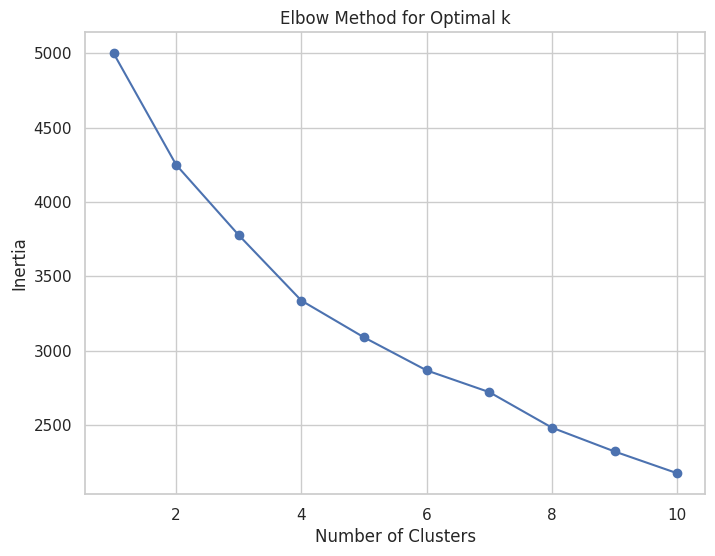

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the sum of squared distances (inertia) for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(credit_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [17]:
# Fit KMeans with the chosen number of clusters (replace 'k_optimal' with your chosen number)
k_optimal = 3  # Replace this with the optimal number from the Elbow Method
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
credit['Cluster'] = kmeans.fit_predict(credit_scaled_df)

# View the first few rows with cluster labels
print(credit.head())


                             CustomerID             Name   Age  CreditScore  \
0  e11fa949-37eb-4999-bdbd-5d3c401b80fa      Chloe Cooke  43.0        592.0   
1  416c9fe3-d43b-45a5-978e-aa8a4311b5c9    Curtis Nguyen  36.0        337.0   
2  b1b99342-704e-449f-90f7-2c5287518e1f  Joseph Gonzalez  47.0        529.0   
3  67a301f6-c1ad-49be-92f6-36e6201c82ac  Anthony Webster  32.0        810.0   
4  a90ff7c6-c1ac-4fe5-896f-dfb1685b7a3b    Felicia Blair  63.0        394.0   

   TransactionAmount  LoanAmount  LatePayments  Cluster  
0             5014.0      2678.0           2.0        2  
1             2265.0      1354.0           5.0        1  
2             2975.0      4134.0           2.0        0  
3             4140.0      2108.0           2.0        2  
4             6080.0      4282.0           0.0        0  


In [18]:
# Group by clusters and calculate the mean for each feature
cluster_means = credit.groupby('Cluster')[numerical_features].mean()
print(cluster_means)


               Age  CreditScore  TransactionAmount   LoanAmount  LatePayments
Cluster                                                                      
0        51.684685   507.696697        5181.648649  3419.222222      3.126126
1        32.044983   446.110727        4467.138408  2049.740484      2.100346
2        40.706349   734.478836        5229.785714  2199.719577      2.097884


In [19]:
# Group by clusters and calculate the mean for each feature
cluster_means = credit.groupby('Cluster')[['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments']].mean()
print(cluster_means)


               Age  CreditScore  TransactionAmount   LoanAmount  LatePayments
Cluster                                                                      
0        51.684685   507.696697        5181.648649  3419.222222      3.126126
1        32.044983   446.110727        4467.138408  2049.740484      2.100346
2        40.706349   734.478836        5229.785714  2199.719577      2.097884


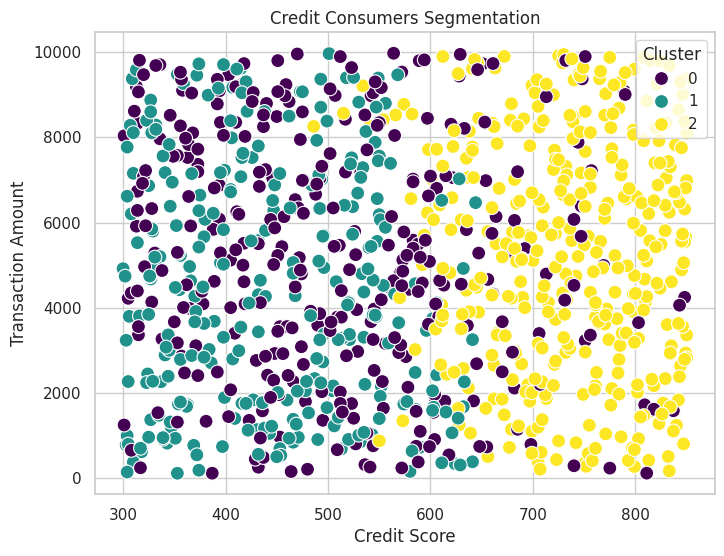

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize clusters using a scatter plot of CreditScore vs. TransactionAmount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=credit, x='CreditScore', y='TransactionAmount', hue='Cluster', palette='viridis', s=100)
plt.title('Credit Consumers Segmentation')
plt.xlabel('Credit Score')
plt.ylabel('Transaction Amount')
plt.show()
